# Cap Stone Projects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import pairplot
%matplotlib inline

## Microeconomic Project

### GA

#### Read data, a total of 4,012,395 observations

In [3]:
ga = pd.read_csv(r'C:\Users\zefan\Desktop\CapStone_Project\data\micro\georgia\georgia.txt')
ga = ga.drop(['Unnamed: 6'], axis = 1)
ga = ga.rename(index = str, columns = {"FISCAL_YEAR": "YEAR"})
print(ga.shape)

(4012395, 6)


In [4]:
ga.head()

,NAME,TITLE,SALARY,TRAVEL,ORGANIZATION,YEAR
0,"COVINGTON,TAMMY D",CORRECTIONS OFFICER(WL),30416.88,90.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013
1,"COWAN,SELINA L",CORRECTIONS OFFICER(WL),4726.76,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013
2,"COWSER,LATOYA",CORRECTIONS OFFICER(WL),3582.38,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013
3,"COX,JAMES K",PROBATION/PAROLEOFFICER(EL),31060.00,168.83,"JUVENILE JUSTICE, DEPARTMENT OF",2013
4,"COX-DENNIS,EVA",CORRECTIONS OFFICER(WL),34063.43,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013


#### No missing value

In [5]:
ga.isnull().any().any()

False

### All the years
#### Descriptive statistics, some individual with salary and travel less than 0, around 1021 over all the years, not a lot

In [97]:
ga.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SALARY,4012395.0,31758.252891,29409.681766,-38666.68,7854.0,25845.65,50000.0,1947070.09
TRAVEL,4012395.0,296.924455,1463.853593,-30899.26,0.0,0.00,0.0,171496.83
YEAR,4012395.0,2013.497280,2.304072,2010.00,2011.0,2013.00,2016.0,2017.00


In [98]:
ga[ga["SALARY"] < 0]['NAME'].count()

1021

#### Pearson Correlation between salary and travel

In [99]:
ga["SALARY"].corr(ga["TRAVEL"])

0.32602045348410491

#### Grouped by title, 5094 titles, count for each title, and mean salary and travel for each title

In [100]:
group = ga.groupby(["TITLE"]).agg({"NAME" : ['count'], "SALARY" : ['mean'], "TRAVEL" : ['mean']})

In [101]:
group.columns = ["COUNT", "SALARY", "TRAVEL"]

#### 10 Most frequent titles

In [102]:
group.sort_values(by = "COUNT", ascending = False).head(10)

,COUNT,SALARY,TRAVEL
TITLE,,,
SUBSTITUTE TEACHER,266027,3847.533223,5.914455
STUDENT ASSISTANT,191417,2514.978649,13.821930
GRADES 9-12 TEACHER,163012,49336.927000,86.113890
BUS DRIVER,124341,16515.880373,5.946602
SCHOOL FOOD SERVICE WORKER,123619,11494.494972,15.143551
SPECIAL EDUCATION INTERRELATED,102346,46468.476507,43.850539
PARAPROFESSIONAL/TEACHER AIDE,101651,16074.005584,10.529259
SPECIAL ED PARAPRO/AIDE,95398,16612.771443,12.051890
CUSTODIAL PERSONNEL,85164,21061.827377,2.652186


#### 10 Highest paid titles

In [103]:
group.sort_values(by = "SALARY", ascending = False).head(10)

,COUNT,SALARY,TRAVEL
TITLE,,,
CHIEF INVESTMENT OFFICER (TRS),8,700332.76500,0.000000
CO-CHIEF INVESTMENT OFF (TRS),12,523386.01250,1445.066667
ASST CHIEF INVEST OFFICER(TRS),8,513539.79000,2455.525000
DIRECTOR OF EQUITIES (TRS),2,499133.17000,0.000000
EXEC CHIEF RESEARCH OFFICER,1,471636.04000,14902.790000
CHANCELLOR,9,461042.49000,14291.653333
SR. VICE PRESIDENT,1,418937.04000,3297.440000
DIR ALTERNATIVE INVESTMENTS,1,376666.66000,6980.390000
CHIEF COMMERCIAL OFFICER,8,368777.14625,88908.233750


#### Graph of the 20 Highest Paid State Employee Titles

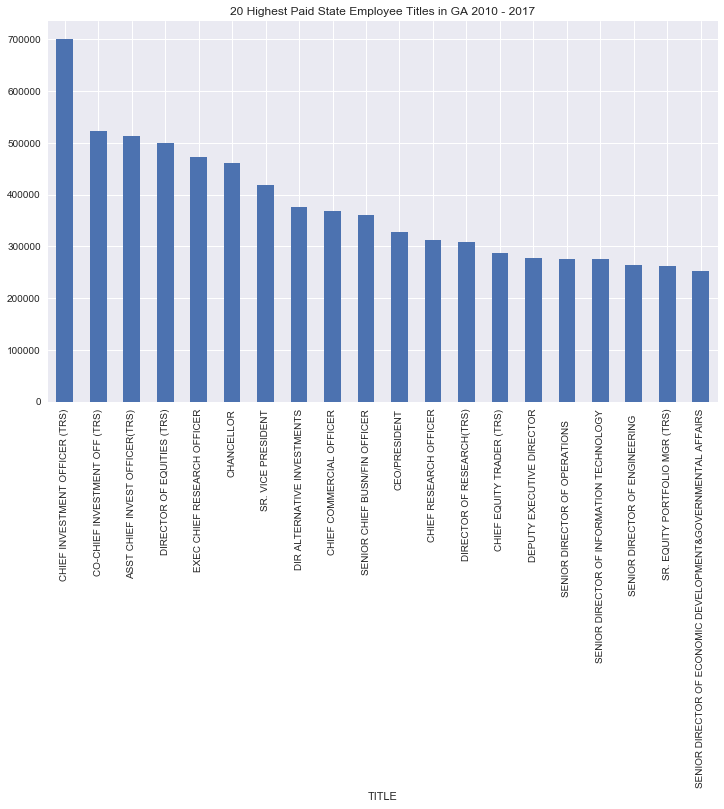

In [307]:
group_paid = group.sort_values(by = "SALARY", ascending = False).head(20)
group_paid['SALARY'].plot.bar(figsize = (12, 7))
plt.title('20 Highest Paid State Employee Titles in GA 2010 - 2017')

#### 10 Most travelled titles

In [104]:
group.sort_values(by = "TRAVEL", ascending = False).head(10)

,COUNT,SALARY,TRAVEL
TITLE,,,
CHIEF COMMERCIAL OFFICER,8,368777.146250,88908.233750
SENIOR DIRECTOR OF TD(CARRIER & NON-CONTAINER SALES),9,221956.792222,47080.456667
DEPUTY EXECUTIVE DIRECTOR,3,277848.836667,46607.990000
SENIOR DIRECTOR OF ECONOMIC DEVELOPMENT&GOVERNMENTAL AFFAIRS,1,252767.620000,28950.580000
SENIOR DIRECTOR OF TD( BCO SALES),7,234492.942857,28129.575714
EXEC CHIEF ATHLETIC ADMIN,1,241900.040000,21701.310000
REGNAL QUALITY ASSURANCE SPEC,30,69968.145667,21053.094667
SENIOR DIRECTOR OF ADMINISTRATION AND GOVERNMENTAL AFFAIRS,4,215935.845000,19850.845000
COO & GENERAL COUNSEL,2,245212.250000,17720.405000


#### Graph of the 20 Most Travelled State Employee Titles

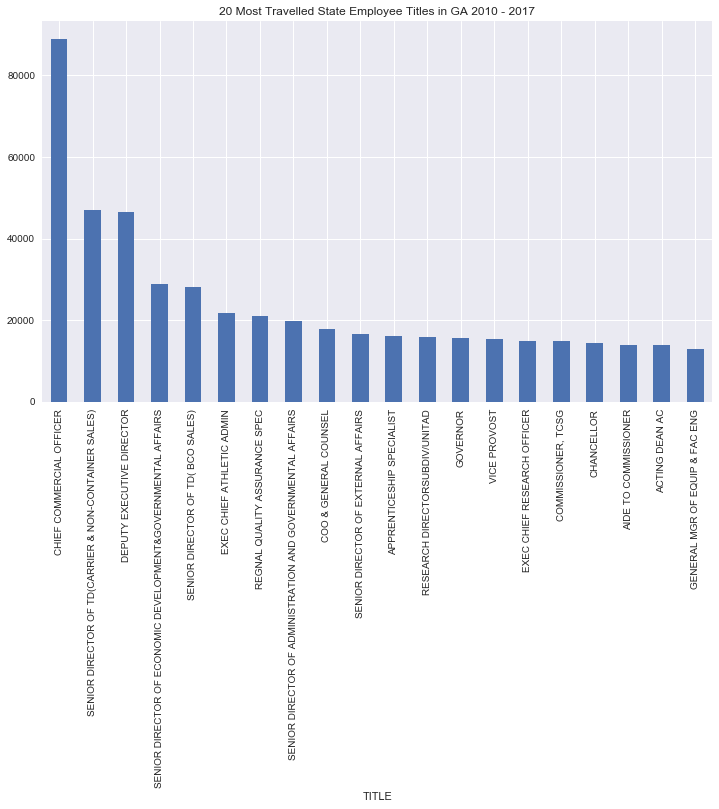

In [306]:
group_travel = group.sort_values(by = "TRAVEL", ascending = False).head(20)
group_travel['TRAVEL'].plot.bar(figsize = (12, 7))
plt.title('20 Most Travelled State Employee Titles in GA 2010 - 2017')

### Graph of relationship between average state salary and number of employees with salary higher than 100,000

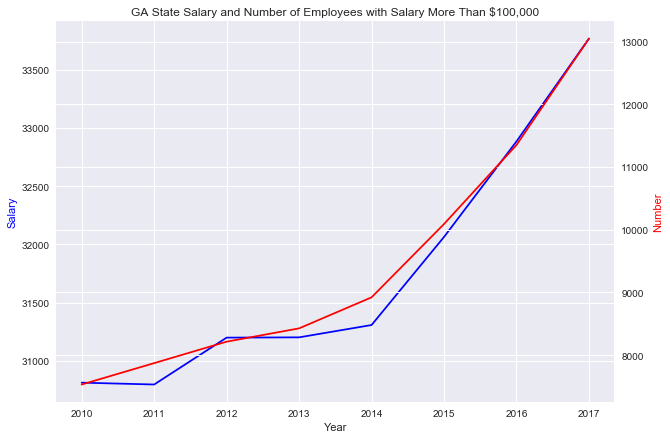

In [6]:
number = {}
salary = {}
n = []
s = []
year = []
for y in ga['YEAR'].unique():
    ga_year = ga[ga["YEAR"] == y].copy()
    salary[y] = ga_year["SALARY"].mean()
    number[y] = ga_year[ga_year["SALARY"] > 100000]["NAME"].count()
for i in number.keys():
    year.append(i)
year.sort()
for j in year:
    n.append(number[j])
    s.append(salary[j])
fig, ax1 = plt.subplots(figsize = (10, 7))
ax2 = ax1.twinx()
ax1.plot(year, s, 'b', label = 'salary')
ax2.plot(year, n, 'r', label = 'number')
ax1.set_xlabel('Year')
ax1.set_ylabel('Salary', color = 'b')
ax2.set_ylabel('Number', color = 'r')
plt.title("GA State Salary and Number of Employees with Salary More Than $100,000")

## Macroeconomic Project

In [2]:
df = pd.read_csv(r'C:\Users\zefan\Desktop\CapStone_Project\data\macro\macro_python.csv')

#### Some variables have missing observations, may need to do something about it later on

In [3]:
df.isnull().any()

year           False
country        False
iso            False
ifs            False
pop            False
rgdpmad        False
rgdppc         False
rconpc          True
gdp             True
iy              True
cpi            False
ca              True
imports         True
exports         True
narrowm         True
money           True
stir            True
ltrate          True
stocks          True
debtgdp         True
revenue         True
expenditure     True
xrusd           True
crisisJST      False
tloans          True
tmort           True
thh             True
tbus            True
hpnom           True
dtype: bool

### USA

In [4]:
dfUSA = df[df["iso"] == "USA"]

In [5]:
dfUSA.shape

(144, 29)

In [6]:
dfUSA.dtypes

year             int64
country         object
iso             object
ifs              int64
pop            float64
rgdpmad        float64
rgdppc         float64
rconpc         float64
gdp            float64
iy             float64
cpi            float64
ca             float64
imports        float64
exports        float64
narrowm        float64
money          float64
stir           float64
ltrate         float64
stocks         float64
debtgdp        float64
revenue        float64
expenditure    float64
xrusd          float64
crisisJST        int64
tloans         float64
tmort          float64
thh            float64
tbus           float64
hpnom          float64
dtype: object

In [7]:
crisis = list(dfUSA[dfUSA['crisisJST'] == 1]['year'])

In [8]:
crisis

[1873, 1893, 1907, 1929, 1984, 2007]

In [9]:
column_usa = dfUSA.columns.tolist()[4:]
column_usa.remove('crisisJST')

#### US house price and crisis

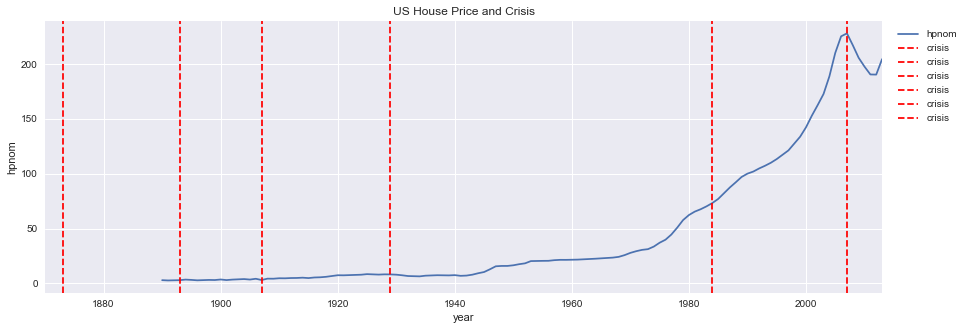

In [10]:
dfUSA.plot(x = 'year', y = ['hpnom'], figsize = (15, 5))
plt.ylabel("hpnom")
for c in crisis:
    plt.axvline(x = c, color = 'r', linestyle = '--', label = 'crisis')
plt.title("US House Price and Crisis")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))

#### US monetary policy, fiscal policay, real, nominal gdp and crisis date

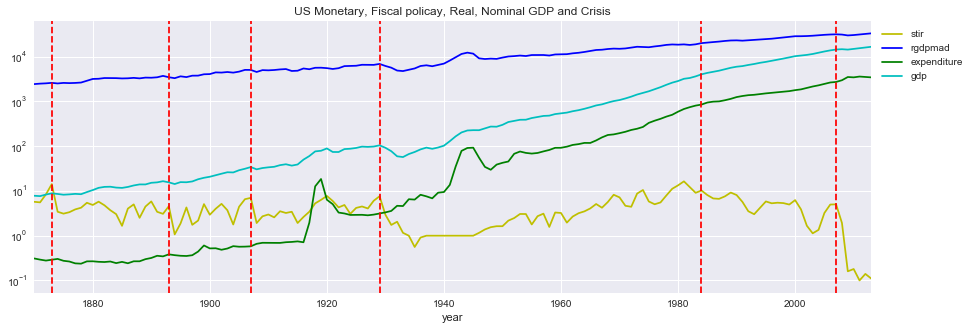

In [11]:
dfUSA.plot(x = 'year', y = ['stir', 'rgdpmad', 'expenditure', 'gdp'], color = ['y', 'b', 'g', 'c'] , figsize = (15, 5))
for c in crisis:
    plt.axvline(x = c, color = 'r', linestyle = '--')
plt.title("US Monetary, Fiscal policay, Real, Nominal GDP and Crisis")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.12, 1))
plt.yscale('log')

#### US other variables over time

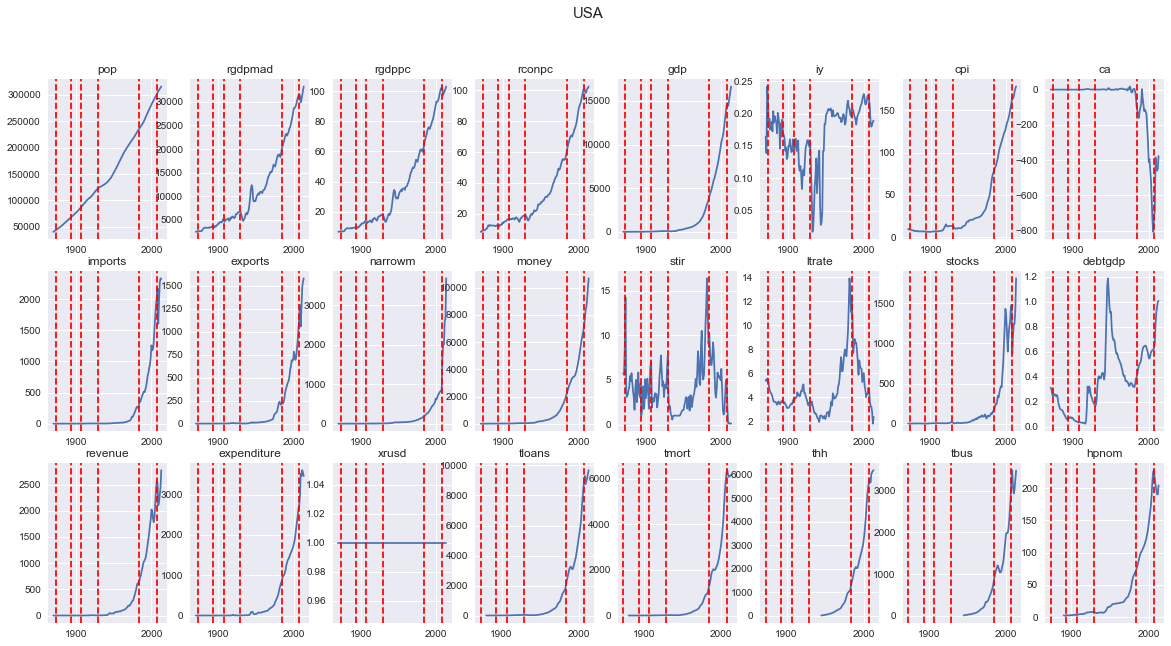

In [15]:
fig, axes = plt.subplots(3, 8, figsize = (20, 10))
axes = axes.ravel()
for ax, v in zip(axes, column_usa):
    ax.plot(dfUSA['year'], dfUSA[v])
    ax.set_title(v)
    for c in crisis:
        ax.axvline(x = c, color = 'r', linestyle = '--')
    fig.suptitle('USA', fontsize = 15)

#### US correlation among some random variables

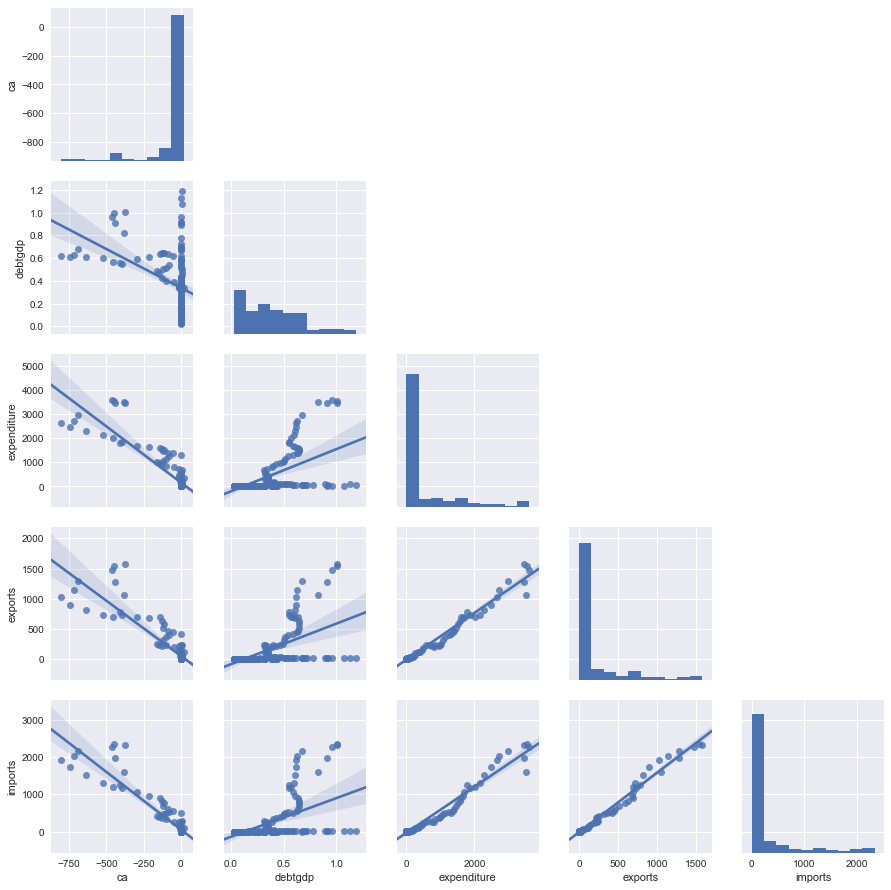

In [16]:
dfUSA2 = dfUSA[['ca', 'debtgdp', 'expenditure', 'exports', 'imports']].copy()
p = pairplot(dfUSA2, kind = 'reg')
row = range(5)
col = range(5)
for i in row:
    for j in col:
        if i < j:
            p.axes[i, j].set_visible(False)

### Loop over all other countries
#### Canada has least amount of crisis, which is believed to has the most stable financial system

In [17]:
country = df["iso"].unique().tolist()

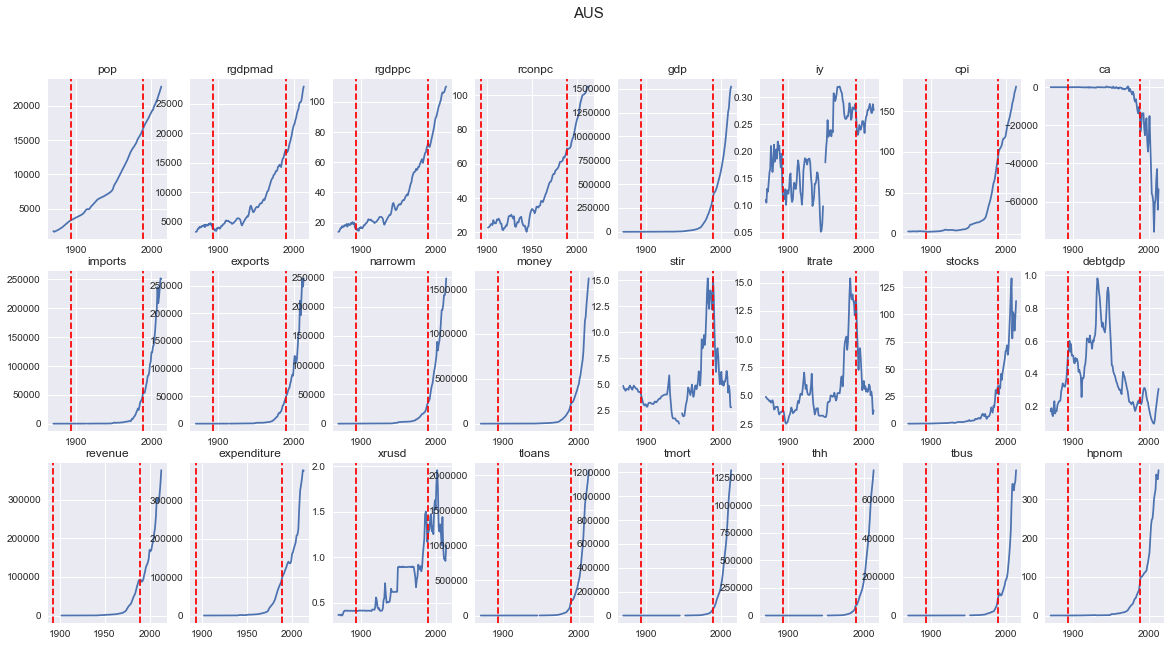

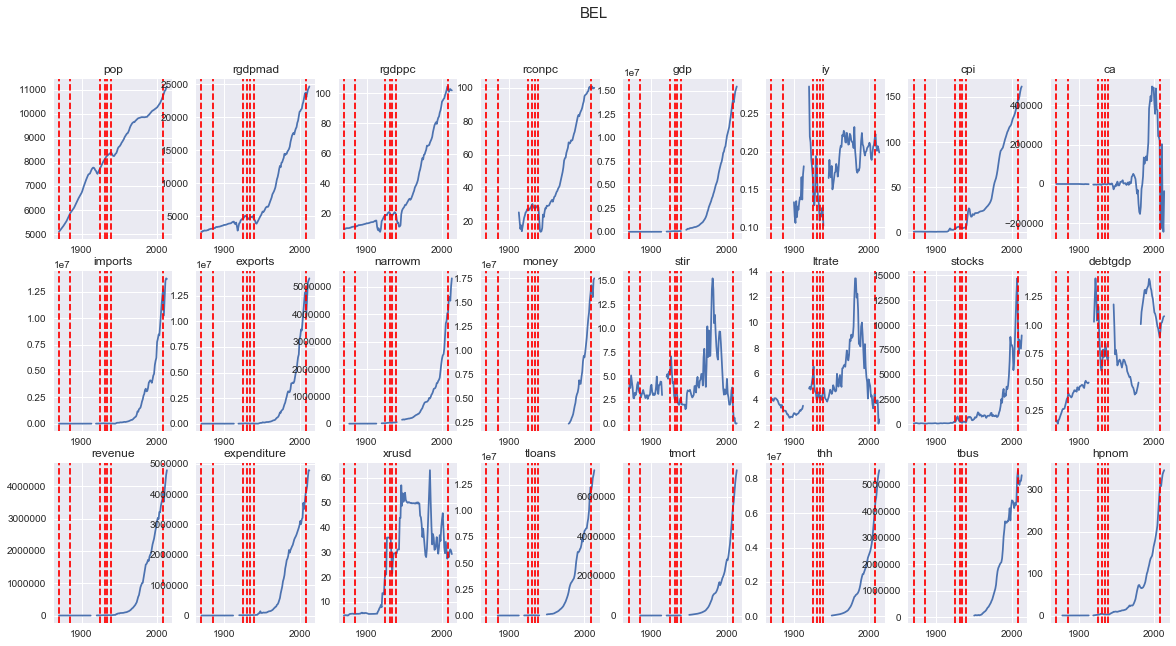

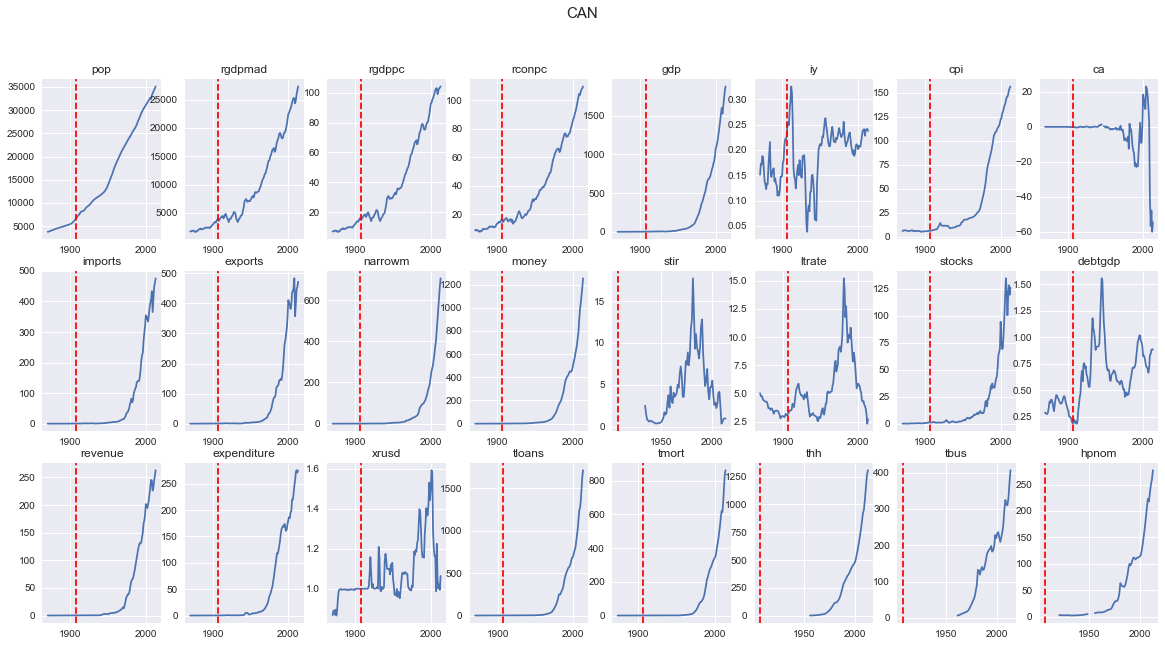

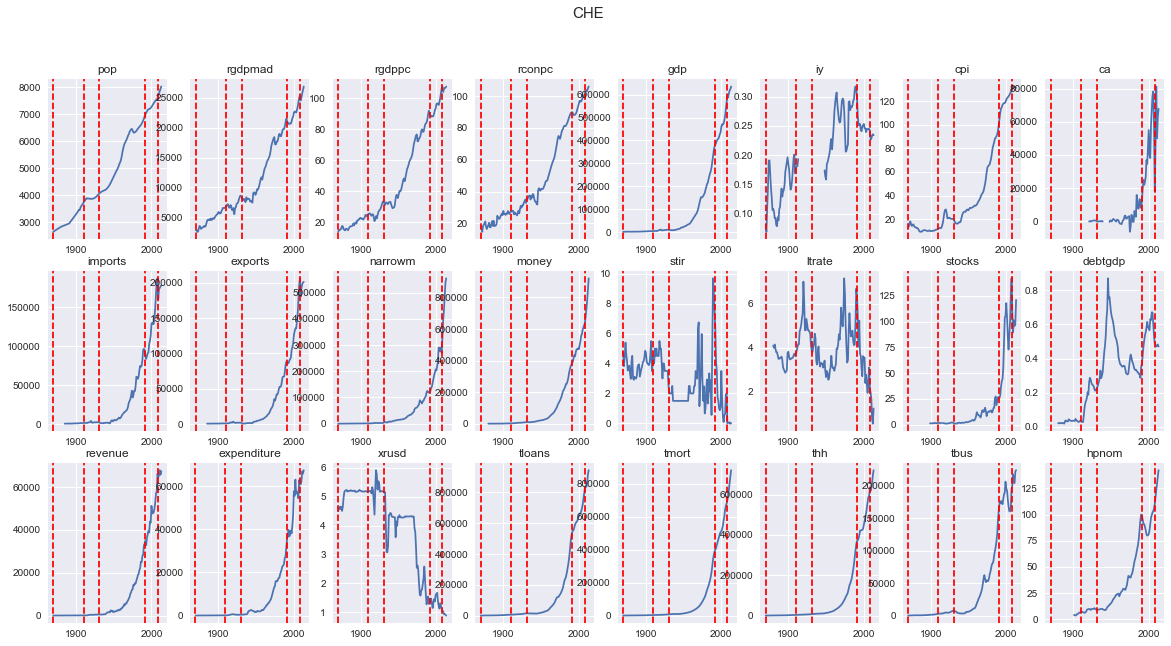

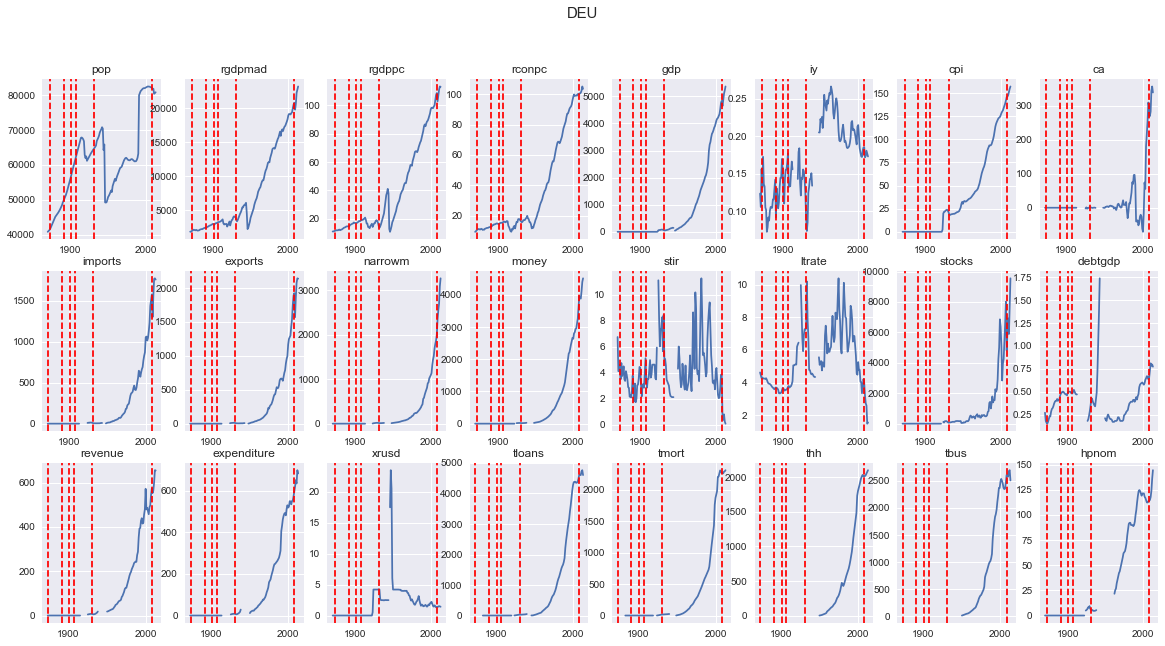

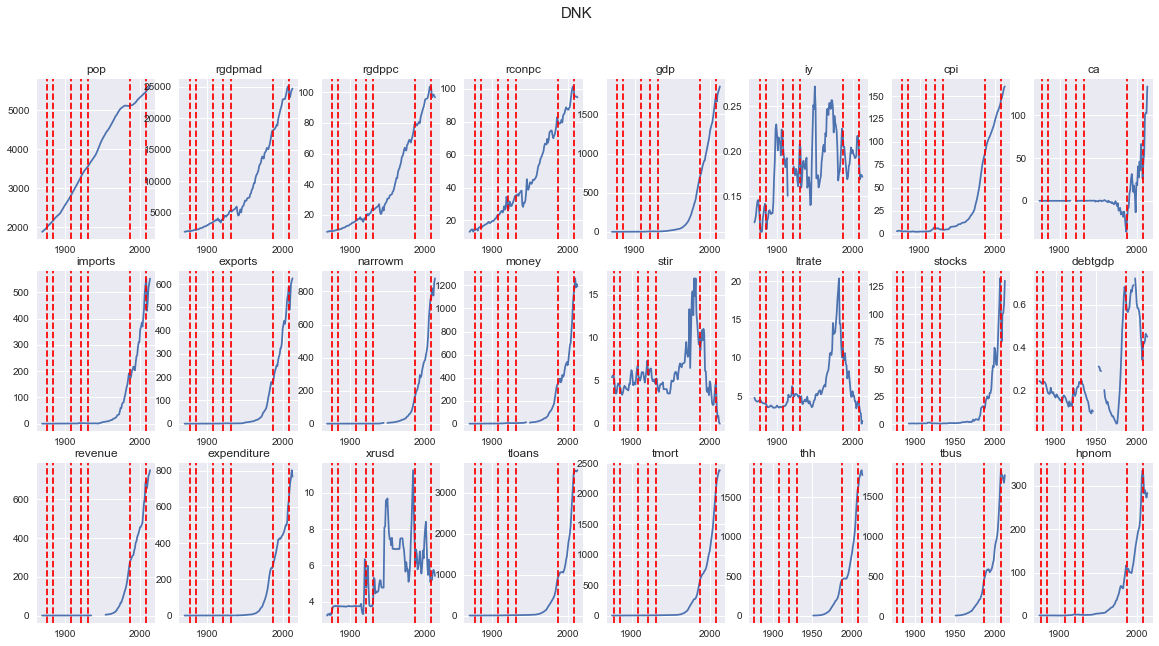

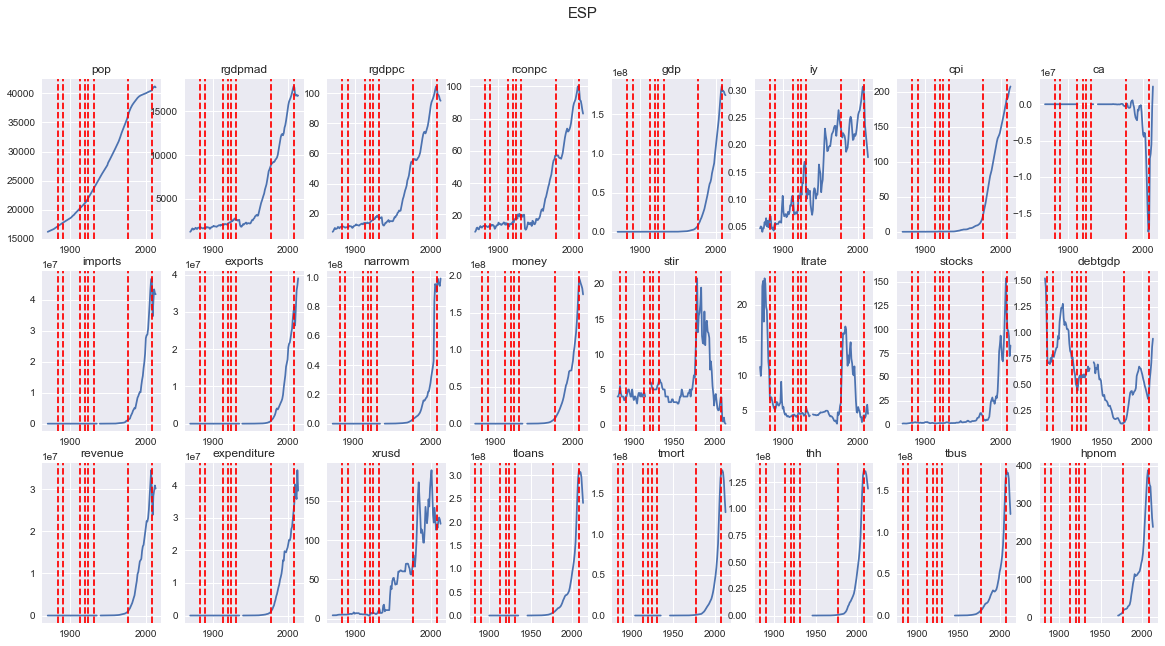

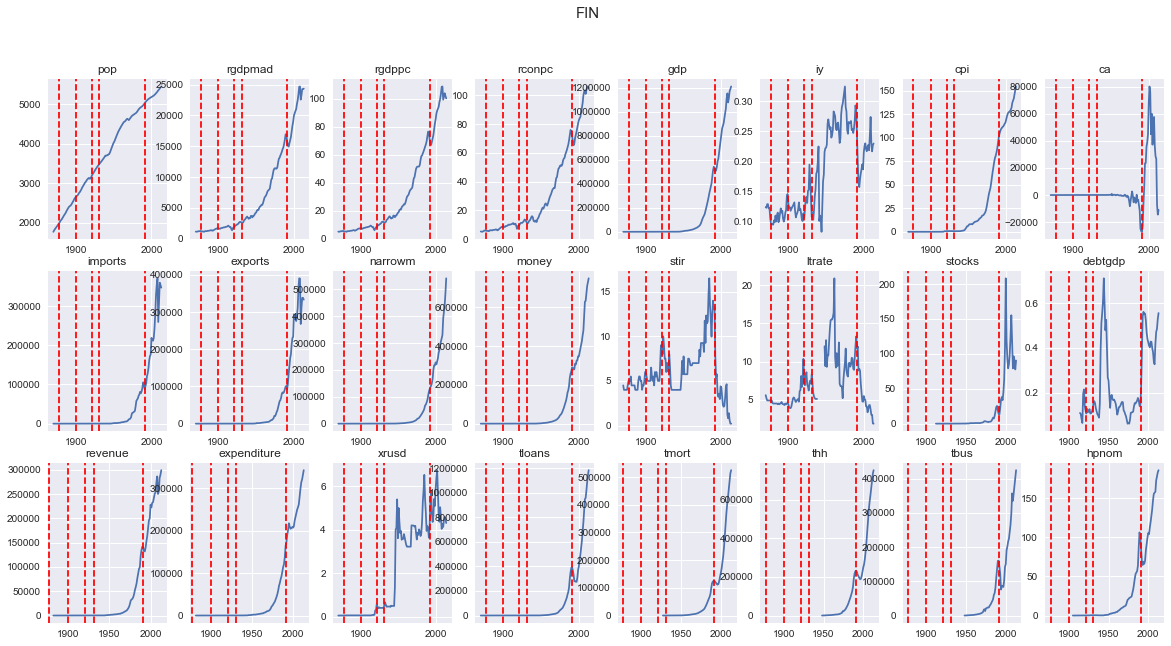

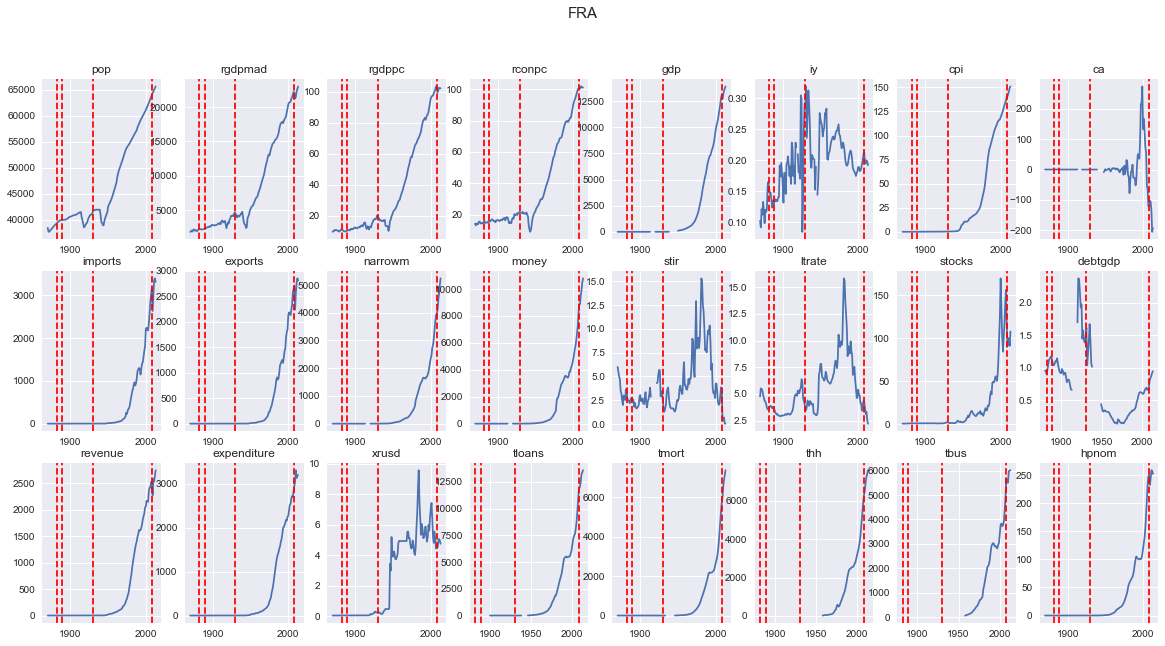

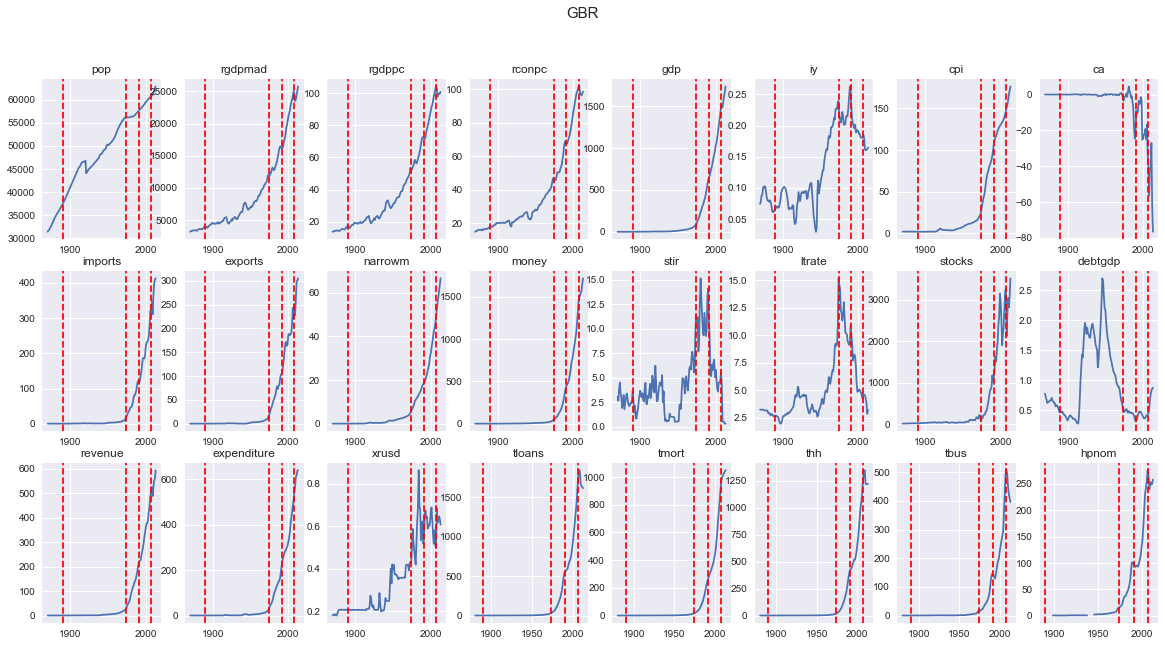

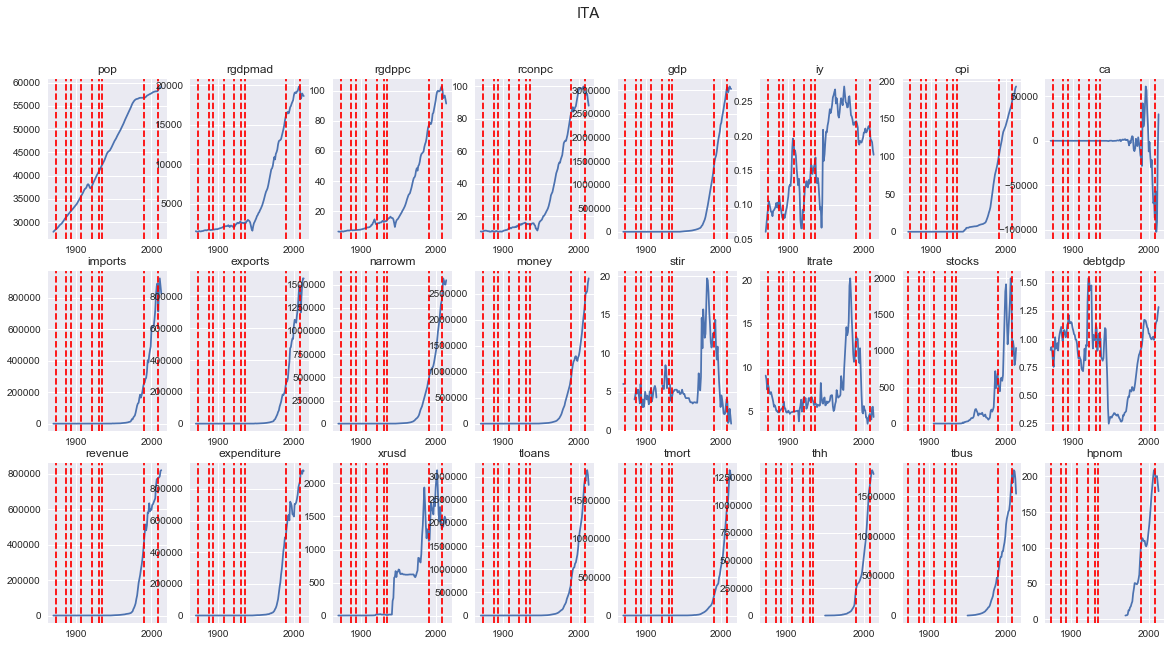

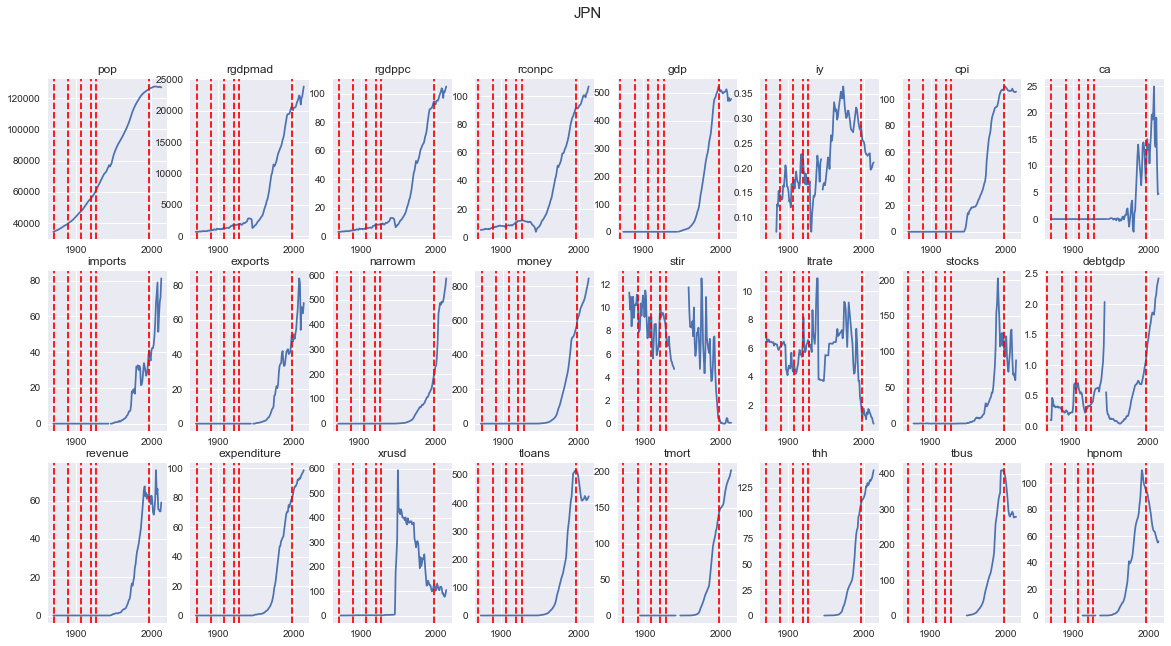

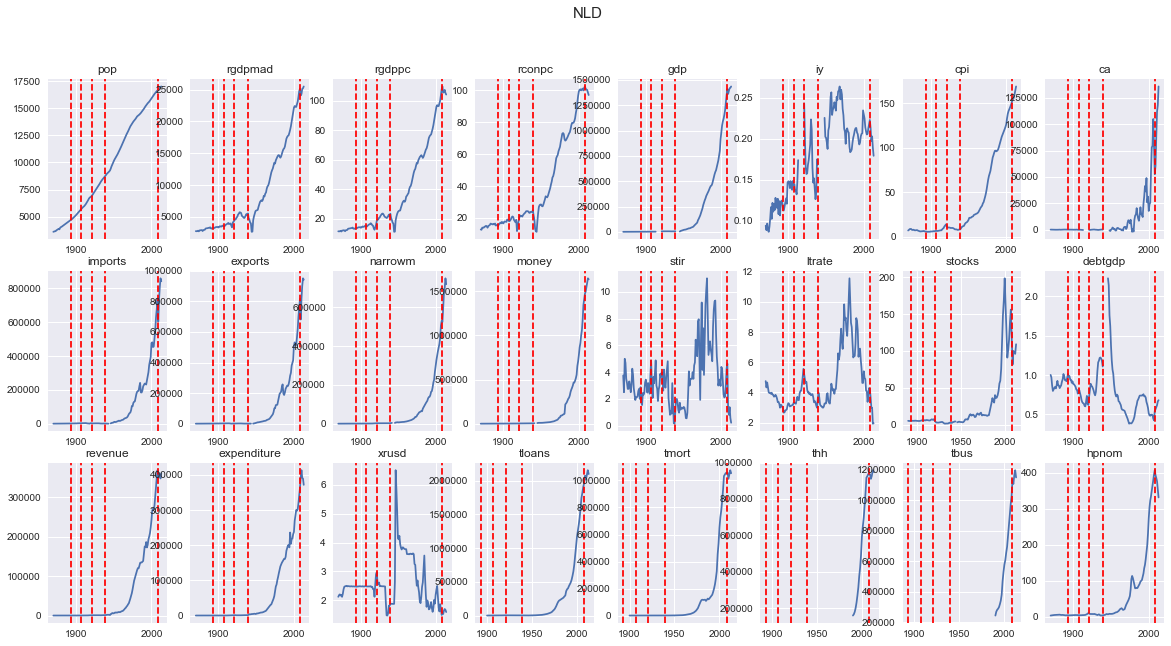

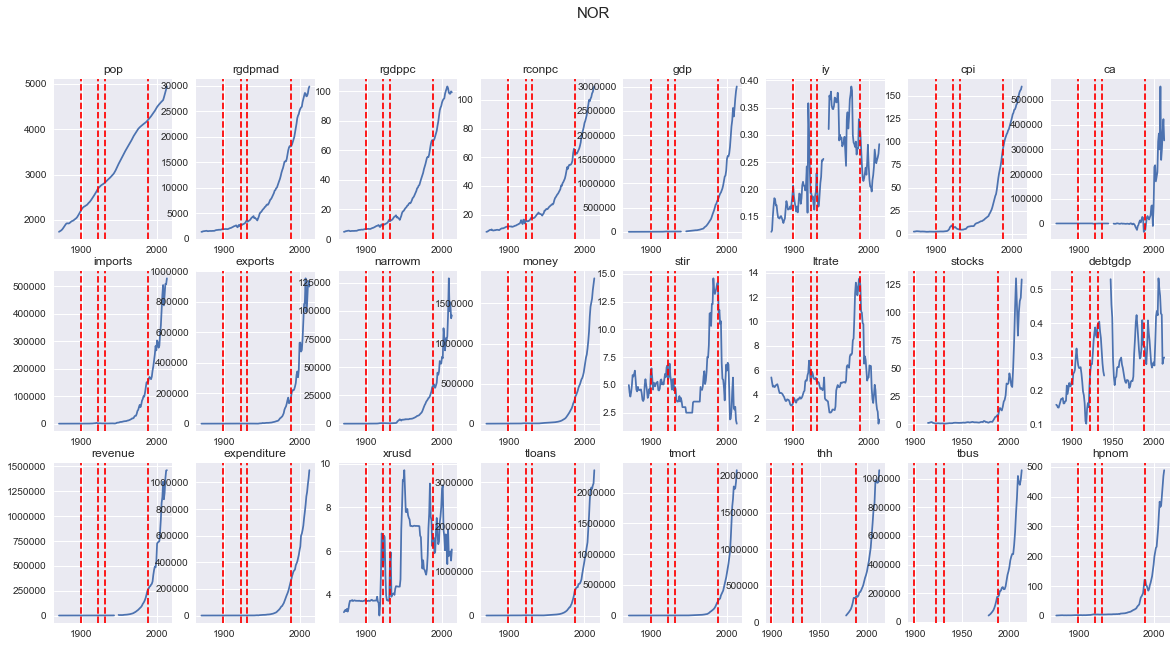

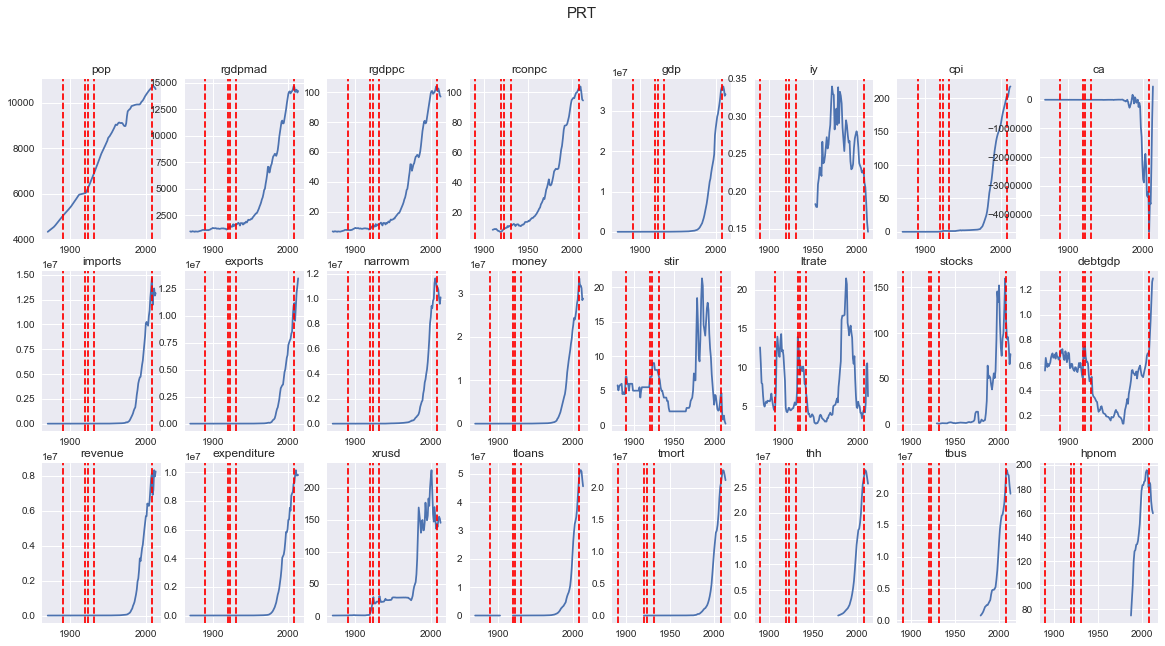

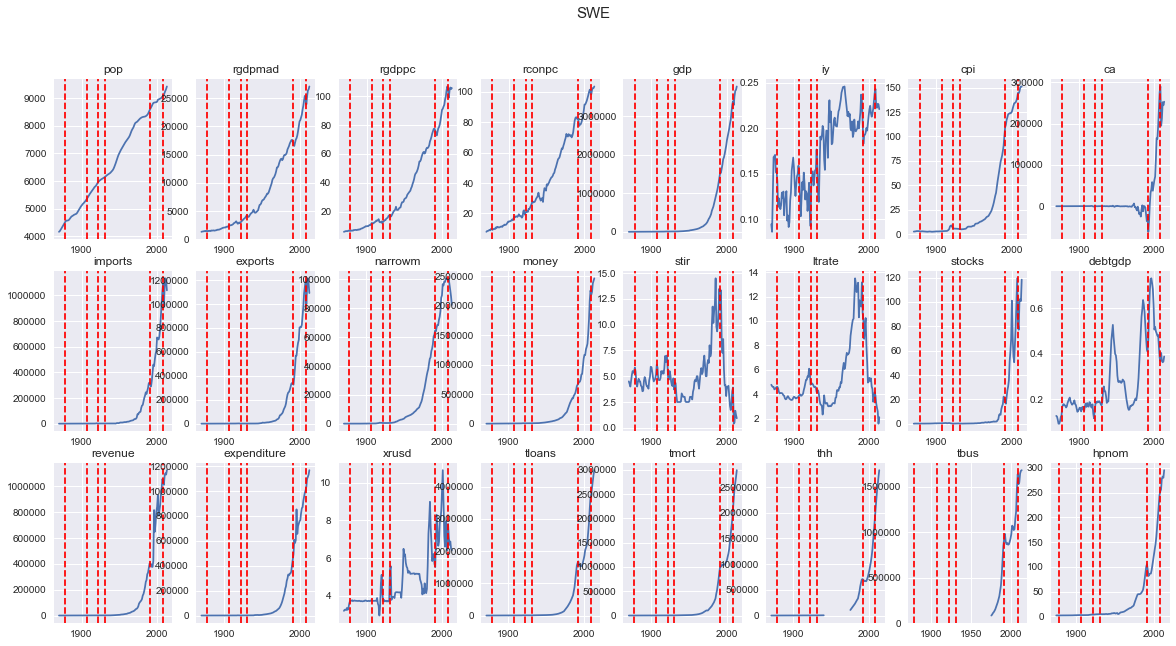

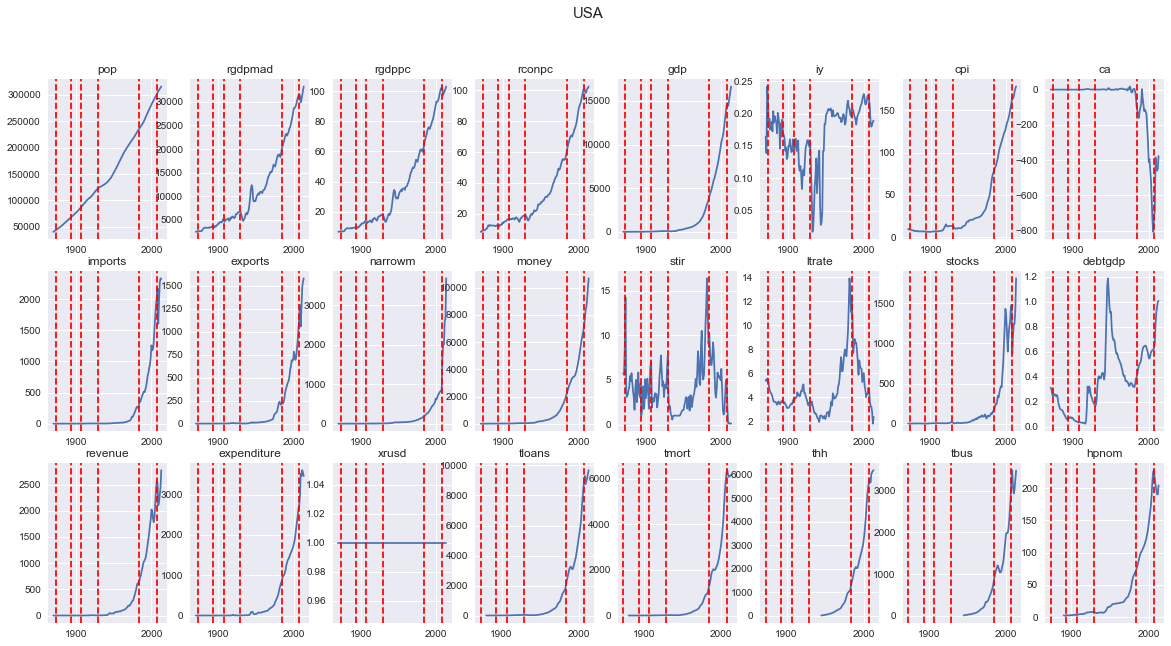

In [18]:
for c in country:
    dfc = df[df["iso"] == c]
    crisis = list(dfc[dfc['crisisJST'] == 1]['year'])
    columnc = dfc.columns.tolist()[4:]
    columnc.remove('crisisJST')
    fig, axes = plt.subplots(3, 8, figsize = (20, 10))
    axes = axes.ravel()
    for ax, v in zip(axes, columnc):
        ax.plot(dfc['year'], dfc[v])
        ax.set_title(v)
        for cri in crisis:
            ax.axvline(x = cri, color = 'r', linestyle = '--')
        fig.suptitle(c, fontsize = 15)